In [1]:
import wfdb
import matplotlib.pyplot as plt

In [2]:
record_path = './data/scddb/30'

In [3]:
record = wfdb.rdrecord(record_path)
ann = wfdb.rdann(record_path, 'atr')
fs = record.fs

In [4]:
start_str = "00:26:35"  # 'beginning at 26:35.000'
vfon_str = "07:54:33"   # 'vfon: 07:54:33'

In [5]:
def hms_to_seconds(hms):
    h, m, s = hms.split(":")
    return int(h)*3600 + int(m)*60 + int(s)

start_seconds = hms_to_seconds(start_str)
vfon_seconds = hms_to_seconds(vfon_str)
delta_seconds = vfon_seconds - start_seconds  # offset into this record

vfon_sample = delta_seconds * fs
print(f"VF onset sample index for record 30: {vfon_sample}")

VF onset sample index for record 30: 6719500


Extracted a 300-second segment before VF onset.


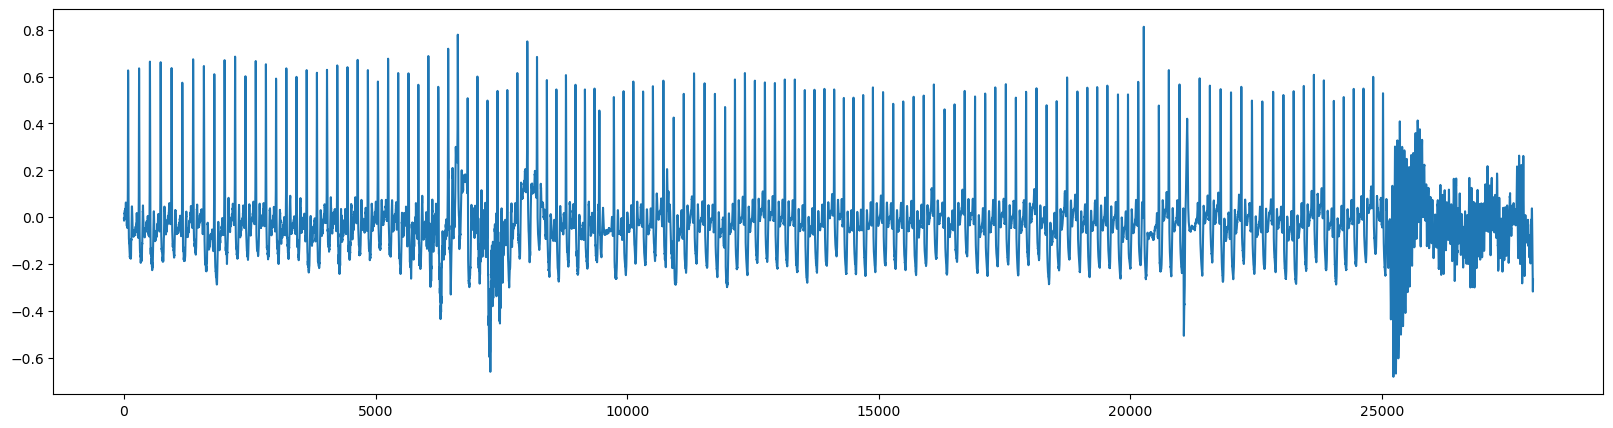

In [10]:
ex_1 = vfon_seconds * fs
import numpy as np

pre_event_sec_1 = 60 * 5  # 1 minute
pre_event_samples_1 = int(pre_event_sec_1 * fs)

start_idx_1 = max(0, ex_1 - pre_event_samples_1)
end_idx_1 = ex_1  # up to the VF onset

ecg_segment_1 = record.p_signal[start_idx_1+50000:ex_1+3000, :]  # shape (samples, 2) if 2 channels

print(f"Extracted a {pre_event_sec_1}-second segment before VF onset.")

plt.figure(figsize=(20, 5))
plt.subplot()
plt.plot(ecg_segment_1[:,0])

plt.savefig('./img/ecg-10min.png', dpi=300, bbox_inches='tight')
plt.show()